<a href="https://colab.research.google.com/github/Carolinsrainbow/UC_MachineLearning/blob/main/Tarea3_Carolina_Herrera_Azolas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instrucciones


- Tipo de actividad: Individual
- Tipo de evaluación: Sumativa (con calificación)
- Ponderación: 10%
- Puntaje: 30 puntos

Instrucciones

1. Antes de comenzar, debes haber revisado todo el material de los módulos 1 , 2 y 3 del curso.
2. Tomando como ejemplo lo realizado en los tutoriales, en esta tarea utilizarás las funciones de generación de datos de sklearn, como por ejemplo make_blobs, make_moons y make_circles, para crear conjuntos de entrenamiento que se adecuen a distintos modelos.
3. Genere múltiples conjuntos de datos (con sus respectivos subconjuntos de entrenamiento y prueba) y entrene sobre ellos al menos los siguientes tipos de modelo: SVM con kernel lineal, SVM con kernel RBF, SVM con kernel polinomial, SVM con kernel sigmoidal, MLP de 2 capas ocultas.
4. Para cada tipo de modelo, encuentre al menos un conjunto de datos donde este obtiene el mejor rendimiento de entre todos los modelos evaluados.
5. Para cada caso, explique el motivo por el cual el modelo ganador obtiene el mejor rendimiento. Utilice visualizaciones similares a las vistas en los tutoriales para justificar sus respuestas.

In [2]:
#Incorporación de librerías

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from IPython.display import display

2. Tomando como ejemplo lo realizado en los tutoriales, en esta tarea utilizarás las funciones de generación de datos de sklearn, como por ejemplo make_blobs, make_moons y make_circles, para crear conjuntos de entrenamiento que se adecuen a distintos modelos.

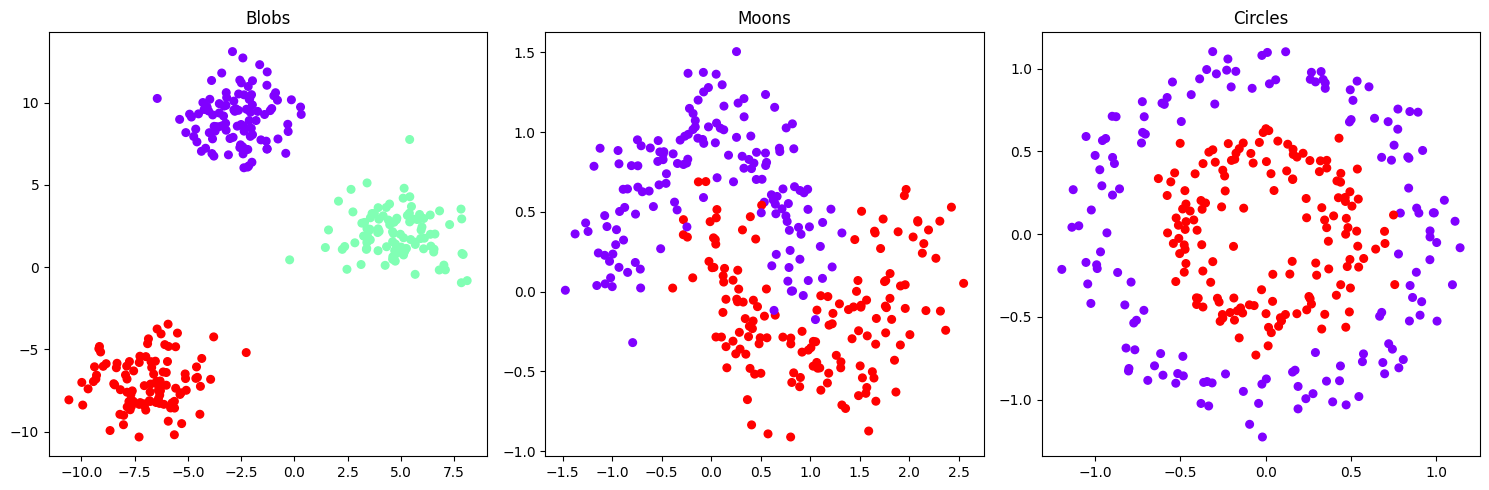

In [12]:
blobs_X, blobs_y = make_blobs(n_samples=300, centers=3, cluster_std=1.5, random_state=42)
moons_X, moons_y = make_moons(n_samples=300, noise=0.2, random_state=42)
circles_X, circles_y = make_circles(n_samples=300, noise=0.1, factor=0.5, random_state=42)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

datasets = [
    ("Blobs", blobs_X, blobs_y),
    ("Moons", moons_X, moons_y),
    ("Circles", circles_X, circles_y),
]

for i, (name, X, y) in enumerate(datasets):
    axes[i].scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow', s=30)
    axes[i].set_title(name)

plt.tight_layout()
plt.show()

3. Genere múltiples conjuntos de datos (con sus respectivos subconjuntos de entrenamiento y prueba) y entrene sobre ellos al menos los siguientes tipos de modelo: SVM con kernel lineal, SVM con kernel RBF, SVM con kernel polinomial, SVM con kernel sigmoidal, MLP de 2 capas ocultas.

In [7]:
datasets_split = {
    "Blobs": train_test_split(blobs_X, blobs_y, test_size=0.3, random_state=42),
    "Moons": train_test_split(moons_X, moons_y, test_size=0.3, random_state=42),
    "Circles": train_test_split(circles_X, circles_y, test_size=0.3, random_state=42),
}

models = {
    "SVM (Lineal)": SVC(kernel="linear", random_state=42),
    "SVM (RBF)": SVC(kernel="rbf", random_state=42),
    "SVM (Polinomial)": SVC(kernel="poly", degree=3, random_state=42),
    "SVM (Sigmoidal)": SVC(kernel="sigmoid", random_state=42),
    "MLP": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42),
}


results = {}

for dataset_name, (X_train, X_test, y_train, y_test) in datasets_split.items():
    results[dataset_name] = {}
    for model_name, model in models.items():

        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        results[dataset_name][model_name] = accuracy

results_df = pd.DataFrame(results).T

print("Resultados de Precisión por Dataset vs Modelo:")
print(results_df)

display(results_df)


Resultados de Precisión por Dataset y Modelo:
         SVM (Lineal)  SVM (RBF)  SVM (Polinomial)  SVM (Sigmoidal)       MLP
Blobs        1.000000   1.000000          0.988889         1.000000  1.000000
Moons        0.900000   0.966667          0.911111         0.644444  0.955556
Circles      0.422222   1.000000          0.422222         0.544444  1.000000


,SVM (Lineal),SVM (RBF),SVM (Polinomial),SVM (Sigmoidal),MLP
Blobs,1.000000,1.000000,0.988889,1.000000,1.000000
Moons,0.900000,0.966667,0.911111,0.644444,0.955556
Circles,0.422222,1.000000,0.422222,0.544444,1.000000


4. Para cada tipo de modelo, encuentre al menos un conjunto de datos donde este obtiene el mejor rendimiento de entre todos los modelos evaluados.

In [8]:
mejorModelo= results_df.idxmax(axis=1)
mejorPuntaje = results_df.max(axis=1)

summary_df = pd.DataFrame({
    "Mejor Modelo": mejorModelo,
    "Precisión": mejorPuntaje
})

print("Mejor modelo para cada conjunto de datos:")
print(summary_df)


Mejor modelo para cada conjunto de datos:
         Mejor Modelo  Precisión
Blobs    SVM (Lineal)   1.000000
Moons       SVM (RBF)   0.966667
Circles     SVM (RBF)   1.000000


5. Para cada caso, explique el motivo por el cual el modelo ganador obtiene el mejor rendimiento. Utilice visualizaciones similares a las vistas en los tutoriales para justificar sus respuestas.

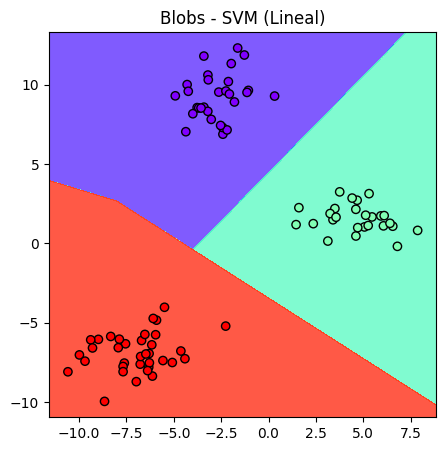

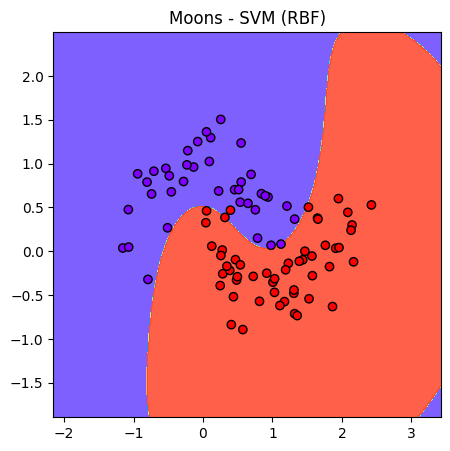

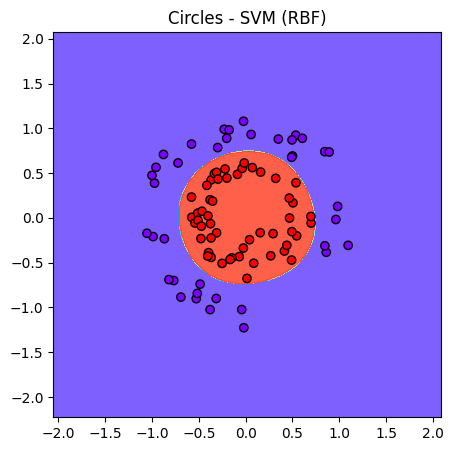

In [13]:
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='rainbow')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='rainbow')
    plt.title(title)

for dataset_name, (X_train, X_test, y_train, y_test) in datasets_split.items():
    best_model_name = summary_df.loc[dataset_name, "Mejor Modelo"]
    best_model = models[best_model_name]
    best_model.fit(X_train, y_train)
    plt.figure(figsize=(5, 5))
    plot_decision_boundary(best_model, X_test, y_test, f"{dataset_name} - {best_model_name}")
    plt.show()


Respuesta 5:

Para cada caso, explique el motivo por el cual el modelo ganador obtiene el mejor rendimiento. Utilice visualizaciones similares a las vistas en los tutoriales para justificar sus respuestas.

1. Blobs - SVM (Kernel Lineal)
Como desprendemos de la ilustración se pueden separar linealmente, debido a que es un kernel lineal donde nos permite encontrar hiperplanos claros que dividen el espacios entre zonas simplificando el conjunto de datos.

2. Moons - SVM (Kernel RBF)

Como caracteristica de make_moons es que no son lineales, se comporta como dos trazos que se entrelazan, por lo que SVM con kernel RBF es el adecuado que permite capturar su relación no lineal a través de una formación del espacio de entrada entre sus zonas curvas.


3. Circles - SVM (Kernel RBF)
Dado que el comportamiento consiste en dos circulos, uno dentro del otro, el patrón no presental linealidad y es dificil de capturar, por lo que SVM con kernel RBF puede proyectar los datos a un espacio donde se vuelven separables, pudiendo marcar las fronteras entre circulos.

